1. read file
2. pick only the lines with a DNA seq
3. find the longest A's streak
4. define the distibution of the nucleotides 
5. define the %  of each nucleotide in each cycle 


# Find the longest streak of 'A' Nucleotide

In [149]:
%time
# count dna_reads in a file
# open file 
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq'
dna_reads = []
n = 160000 # number of lines in a file

# make lists of dna reads
with open(path_to_file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
    for line_number in range(n):
        if line_number in range(1,n,4):
            s = f.readline()
            s = s.replace('\n', '')
            dna_reads.append(s)
        else:
            next(f)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


In [150]:
def histo(d, plot_title='empty title'):
    """show a histogram based on dictionary"""
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = 15, 6

    plt.bar(range(len(d)), d.values(), align='center')
    plt.xticks(range(len(d)), list(sorted(d.keys())))
    plt.title(plot_title)
    plt.show()


In [151]:
%%time
result = list()
for s in dna_reads:
    result.append(longest_a_streak(s))

CPU times: user 262 ms, sys: 8.34 ms, total: 270 ms
Wall time: 292 ms


In [153]:
d = dict() # d = {}
for r in result:
    if r not in d.keys():
        d[r] = 1
    else:
        d[r] += 1
        
import copy
dict_longest_streak_a = copy.deepcopy(d)

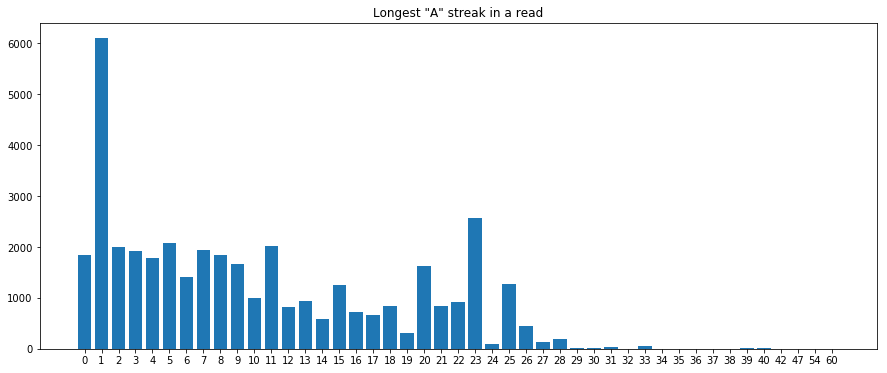

In [154]:
histo(d, plot_title='Longest "A" streak in a read')

# Total 'A' count in a read

In [155]:
result = []
counter_A = 0
for s in dna_reads:
    for base in s:
        if base == 'A':
            counter_A += 1
    result.append(counter_A)
    counter_A = 0
            
print(result[0:10])
print(len(result))

[28, 16, 17, 31, 29, 23, 29, 12, 31, 18]
40000


In [156]:
d = dict()
for r in result:
    if r in d.keys():
        d[r] += 1
    else:
        d[r] = 1

import copy        
dict_count_a = copy.deepcopy(d)

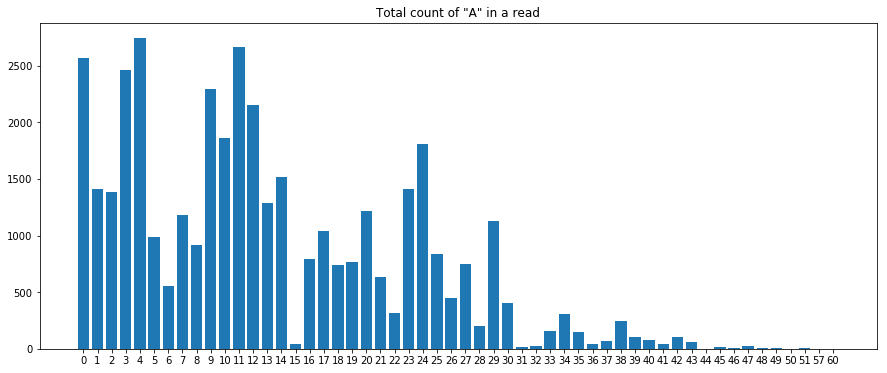

In [157]:
histo(d, plot_title='Total count of "A" in a read')

# Count DNA reads by pool 

In [76]:
d = {
'ACAG': 0,
'AGTC': 0,
'ATCA': 0,
'CATG': 0,
'CTAC': 0,
'TCTA': 0,
'TGAT': 0,
'TTGG': 0,
'unknown': 0
}

In [87]:
%time
for s in dna_reads:
    pool = s[3:7] 
    if pool in d.keys():
        d[pool] += 1
    else:
        d['unknown'] += 1



CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 42 µs


In [78]:
print(d)

{'ACAG': 6374, 'AGTC': 7039, 'ATCA': 5960, 'CATG': 6634, 'CTAC': 7194, 'TCTA': 1, 'TGAT': 0, 'TTGG': 5564, 'unknown': 1234}


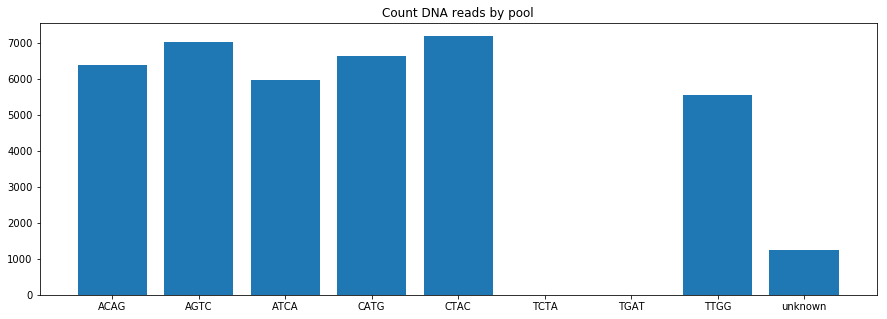

In [79]:
histo(d, plot_title='Count DNA reads by pool')

In [80]:
%whos

Variable           Type             Data/Info
---------------------------------------------
a                  str              AAAA
base               str              C
counter_A          int              0
d                  dict             n=9
dna                tuple            n=0
dna_reads          list             n=40000
f                  TextIOWrapper    <_io.TextIOWrapper name='<...>ode='r' encoding='UTF-8'>
histo              function         <function histo at 0x117aa4e18>
i                  tuple            n=2
line_number        int              159999
longest_a_streak   function         <function longest_a_streak at 0x10dd01a60>
n                  int              160000
path_to_file       str              /Users/dariapodorskaja/De<...>NoIndex_L007_R1_001.fastq
pool               str              ATCA
r                  int              30
result             list             n=40000
s                  str              CTAATCAAAAAAAAAAAAAAAAGAT<...>GATCGGAAGAGCACACGTCT

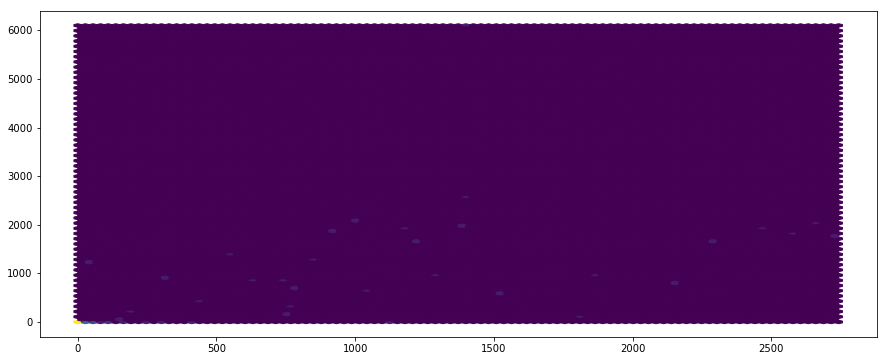

In [162]:
import numpy as np
import matplotlib.pyplot as plt

x = list(dict_count_a.values())  #countA
y = list(dict_longest_streak_a.values()) # longest streakA
plt.hexbin(x,y)

plt.show()

In [161]:
for i in range(61):
    if i not in dict_longest_streak_a.keys():
        dict_longest_streak_a[i] = 0
for i in range(61):
    if i not in dict_count_a.keys():
        dict_count_a[i] = 0        

In [163]:
dict_count_a

{0: 4,
 1: 20,
 2: 28,
 3: 43,
 4: 41,
 5: 56,
 6: 76,
 7: 105,
 8: 151,
 9: 197,
 10: 306,
 11: 407,
 12: 556,
 13: 763,
 14: 1036,
 15: 1283,
 16: 1411,
 17: 1388,
 18: 1182,
 19: 919,
 20: 740,
 21: 750,
 22: 791,
 23: 990,
 24: 1218,
 25: 1520,
 26: 1862,
 27: 2293,
 28: 2569,
 29: 2742,
 30: 2667,
 31: 2458,
 32: 2152,
 33: 1806,
 34: 1411,
 35: 1126,
 36: 838,
 37: 636,
 38: 452,
 39: 317,
 40: 241,
 41: 161,
 42: 104,
 43: 65,
 44: 46,
 45: 28,
 46: 19,
 47: 7,
 48: 6,
 49: 7,
 50: 2,
 51: 2,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 1,
 58: 0,
 59: 0,
 60: 1}